# Wind Farm: Offshore-WA-OR

In [40]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 15})

## 1.- Load file

In [2]:
path = '/Users/tmorales/tmp/RNN-windPower/database/wind_farms/Offshore_WA_OR'
filename = 'windpark_Offshore_WA_OR_turbine_25915.csv'

In [7]:
parse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
turbine_25915 = pd.read_csv(os.path.join(path, filename),
                            sep=';',
                            parse_dates=['Date(YYYY-MM-DD hh:mm:ss)'],
                            date_parser=parse,
                            index_col=0)

In [8]:
turbine_25915.head()

,100m wind speed (m/s),rated power output at 100m (MW),SCORE-lite power output at 100m (MW),CorrectedScore
Date(YYYY-MM-DD hh:mm:ss),,,,
2004-01-01 00:00:00,7.41,7.146,8.867,8.867
2004-01-01 00:10:00,7.10,6.204,1.409,1.409
2004-01-01 00:20:00,6.96,5.775,5.859,5.859
2004-01-01 00:30:00,6.65,5.055,4.745,4.745
2004-01-01 00:40:00,6.78,5.361,5.829,5.829


In [10]:
turbine_25915.index.names = ['date']
turbine_25915 = turbine_25915.rename(columns={'100m wind speed (m/s)': 'wind_speed_100m_m/s',
                                              ' rated power output at 100m (MW)': 'rated_power_output_100m_MW' ,
                                              ' SCORE-lite power output at 100m (MW)': 'SCORE-lite_power_100m_MW',
                                              'CorrectedScore': 'Corrected_Score'})
turbine_25915.head()

,wind_speed_100m_m/s,rated_power_output_100m_MW,SCORE-lite_power_100m_MW,Corrected_Score
date,,,,
2004-01-01 00:00:00,7.41,7.146,8.867,8.867
2004-01-01 00:10:00,7.10,6.204,1.409,1.409
2004-01-01 00:20:00,6.96,5.775,5.859,5.859
2004-01-01 00:30:00,6.65,5.055,4.745,4.745
2004-01-01 00:40:00,6.78,5.361,5.829,5.829


## 2.- Time serie

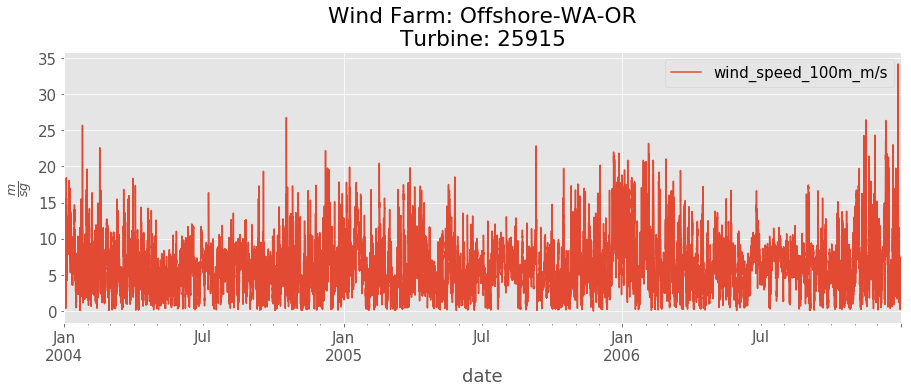

In [42]:
title = 'Wind Farm: Offshore-WA-OR\nTurbine: 25915'
ax = turbine_25915[['wind_speed_100m_m/s']].plot(figsize=(15,5),
                                                 title=title)
ax.set_ylabel(r"$\frac{m}{sg}$");

In [44]:
print('Number of values: {0}'.format(turbine_25915.shape[0]))

Number of values: 157824


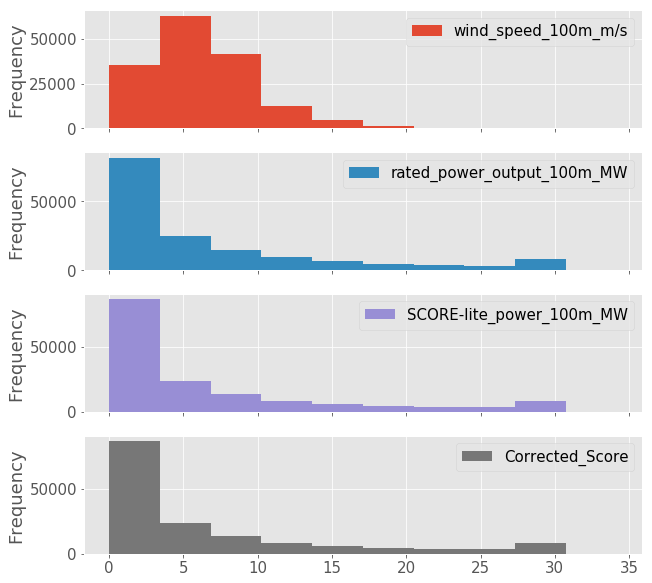

In [54]:
turbine_25915.plot(kind='hist', subplots=True, figsize=(10,10));

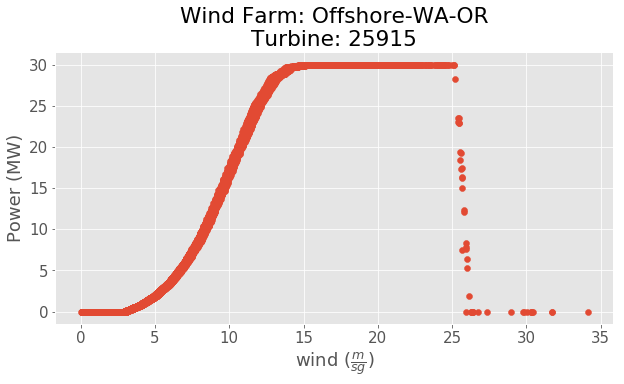

In [41]:
f = plt.figure(figsize=(10, 5))
plt.scatter(turbine_25915['wind_speed_100m_m/s'].values, 
           turbine_25915['rated_power_output_100m_MW'].values)
plt.ylabel(r'Power (MW)')
plt.xlabel(r'wind ($\frac{m}{sg})$')
plt.title(title);

## Nan values

In [50]:
true_index = pd.date_range(turbine_25915[['wind_speed_100m_m/s']].index.min(),
                           turbine_25915[['wind_speed_100m_m/s']].index.max(),
                           freq='10min')
len(true_index)

157824

**The shape of dataset and the true index are the same. Threre are not exist nan values.**